<h1>Problema OneMax<h1>

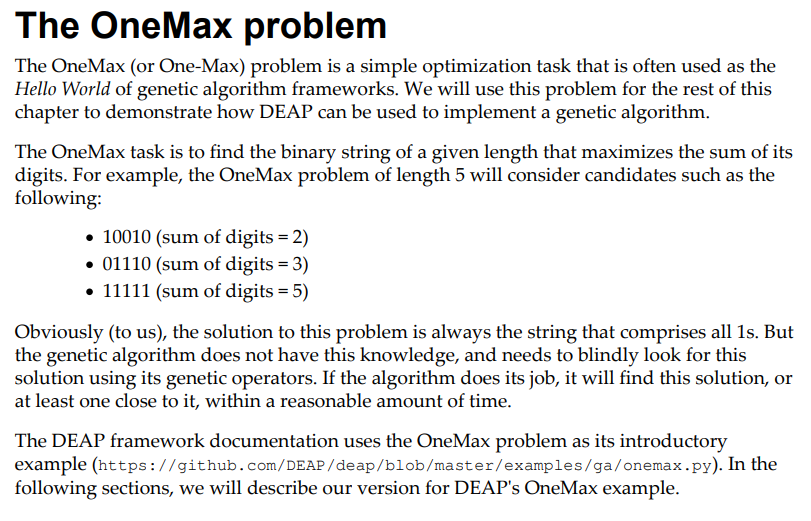

<h1>Baixando as bibliotecas<h1>



In [1]:
!pip install deap
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h1>Genetic Algorithms<h1>

In [27]:
from deap.tools.support import Statistics
from deap import creator, base, tools, algorithms
import matplotlib.pyplot as plt
import random as rd
import numpy as np


# STRUCTURE
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("chromosomeStructure", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()


# CHROMOSOME AND POPULATION
def gene():
  g = rd.randint(0,1)
  return g
CHROMOSOME_LENGTH = 5
toolbox.register("gene", gene)
toolbox.register("chromosome", tools.initRepeat, creator.chromosomeStructure, toolbox.gene, CHROMOSOME_LENGTH)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.chromosome)


# GENETIC OPERATORS
def fitness_function(individual):
  return sum(individual), # Precisa retornar uma tupla para ser armazenado na classe FITNESS
toolbox.register("evaluate", fitness_function)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/CHROMOSOME_LENGTH) 


# STORING INFORMATIONS
def getting_statistics_of_all_individuals(individual):
  return individual.fitness.values
estatistica = tools.Statistics(getting_statistics_of_all_individuals)
estatistica.register('mean', np.mean)
estatistica.register('min', np.min)
estatistica.register('max', np.max)
def porcentagem(fitness_values):
  maximo = max(fitness_values)
  return int(maximo[0])/CHROMOSOME_LENGTH
estatistica.register("porcent_of_the_best_solution", porcentagem)
hof = tools.HallOfFame(3) # hall da fama


# PAINEL DE CONTROLE
POPULATION_SIZE = 4
PROBABILITY_CROSSOVER = 0.9
PROBABILITY_MUTATION = 0.1
MAX_GENERATIONS = 5 # (stopping condition)
#rd.seed(42)

# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, log = algorithms.eaSimple(population,
                                  toolbox,
                                  cxpb=0.5,
                                  mutpb=0.25,
                                  stats=estatistica,
                                  ngen=MAX_GENERATIONS,
                                  halloffame=hof,
                                  verbose=True)

gen	nevals	mean	min	max	porcent_of_the_best_solution
0  	4     	2.75	2  	4  	0.8                         
1  	2     	3.25	2  	4  	0.8                         
2  	3     	3.75	3  	4  	0.8                         
3  	4     	4   	4  	4  	0.8                         
4  	0     	4   	4  	4  	0.8                         
5  	3     	3.5 	3  	4  	0.8                         


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'chromosomeStructure' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


<h1>Resultados<h1>

In [28]:
print(sorted(result, key=lambda x: sum(x), reverse=True)) # Individuos da ultima geração

[[1, 1, 1, 0, 1], [1, 1, 1, 0, 1], [0, 1, 1, 1, 0], [1, 1, 0, 0, 1]]


In [29]:
print(hof) # hall da fama dos 3 melhores individuos de todas as gerações

[[1, 1, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 0, 1]]


In [30]:
print(fitness_function(hof[0]))

(4,)


In [31]:
print(log)

gen	nevals	mean	min	max	porcent_of_the_best_solution
0  	4     	2.75	2  	4  	0.8                         
1  	2     	3.25	2  	4  	0.8                         
2  	3     	3.75	3  	4  	0.8                         
3  	4     	4   	4  	4  	0.8                         
4  	0     	4   	4  	4  	0.8                         
5  	3     	3.5 	3  	4  	0.8                         


<h1>Visualizações<h1>

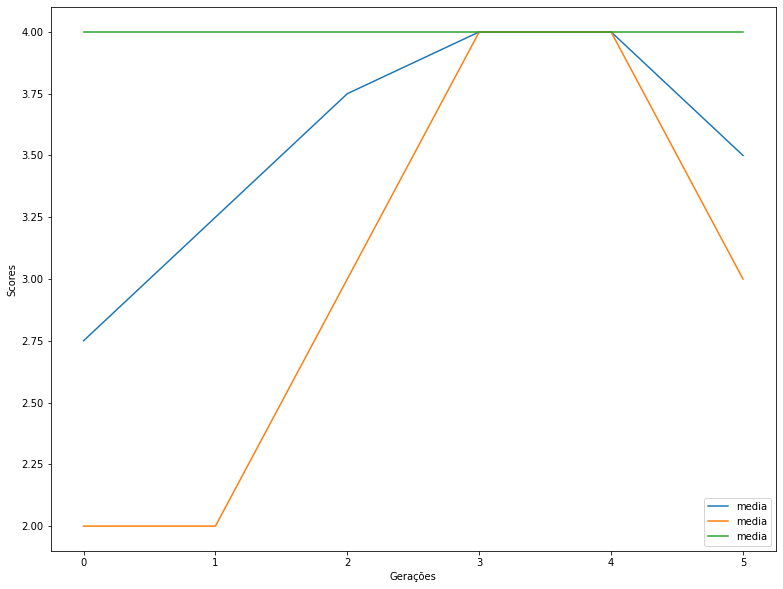

In [51]:
# taking data
y_mean = log.select("mean")
y_min = log.select("min")
y_max = log.select("max")
x_gen = log.select("gen")

#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="media")
plt.plot(x_gen, y_max, label="media")

plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=4)

<h1>O problema termina aqui. Agora irei testar resolver o mesmo problema com o cromossomo bem maior e mais gerações<h1>

In [75]:
# STRUCTURE
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("chromosomeStructure", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()


# CHROMOSOME AND POPULATION
def gene():
  g = rd.randint(0,1)
  return g
CHROMOSOME_LENGTH = 500
toolbox.register("gene", gene)
toolbox.register("chromosome", tools.initRepeat, creator.chromosomeStructure, toolbox.gene, CHROMOSOME_LENGTH)
toolbox.register("PopulationCreator", tools.initRepeat, list, toolbox.chromosome)


# GENETIC OPERATORS
def fitness_function(individual):
  return sum(individual), # Precisa retornar uma tupla para ser armazenado na classe FITNESS
toolbox.register("evaluate", fitness_function)
toolbox.register("select", tools.selTournament, tournsize=50)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1/CHROMOSOME_LENGTH) 


# STORING INFORMATIONS
def getting_statistics_of_all_individuals(individual):
  return individual.fitness.values
estatistica = tools.Statistics(getting_statistics_of_all_individuals)
estatistica.register('mean', np.mean)
estatistica.register('min', np.min)
estatistica.register('max', np.max)
def porcentagem(fitness_values):
  maximo = max(fitness_values)
  return int(maximo[0])/CHROMOSOME_LENGTH
estatistica.register("porcent_of_the_best_solution", porcentagem)
hof = tools.HallOfFame(3) # hall da fama


# PAINEL DE CONTROLE
POPULATION_SIZE = 100
PROBABILITY_CROSSOVER = 1
PROBABILITY_MUTATION = 0.1
MAX_GENERATIONS = 100 # (stopping condition)
#rd.seed(42)

# EVOLVING THE SOLUTION
generationCounter = 0
population = toolbox.PopulationCreator(n=POPULATION_SIZE)
result, log = algorithms.eaSimple(population,
                                  toolbox,
                                  cxpb=0.5,
                                  mutpb=0.25,
                                  stats=estatistica,
                                  ngen=MAX_GENERATIONS,
                                  halloffame=hof,
                                  verbose=True)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'chromosomeStructure' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	mean  	min	max	porcent_of_the_best_solution
0  	100   	251.22	228	279	0.558                       
1  	76    	275.34	254	297	0.594                       
2  	46    	292.4 	276	306	0.612                       
3  	60    	303.72	296	308	0.616                       
4  	67    	307.03	305	309	0.618                       
5  	59    	308.62	306	311	0.622                       
6  	65    	310.59	309	313	0.626                       
7  	59    	312.53	308	315	0.63                        
8  	61    	314.54	312	316	0.632                       
9  	54    	316   	314	319	0.638                       
10 	61    	318.26	316	321	0.642                       
11 	56    	320.34	318	322	0.644                       
12 	68    	321.66	318	324	0.648                       
13 	63    	323.3 	320	326	0.652                       
14 	66    	325.54	323	328	0.656                       
15 	58    	327.14	324	329	0.658                       
16 	71    	328.29	325	331	0.662                       
17 	51    

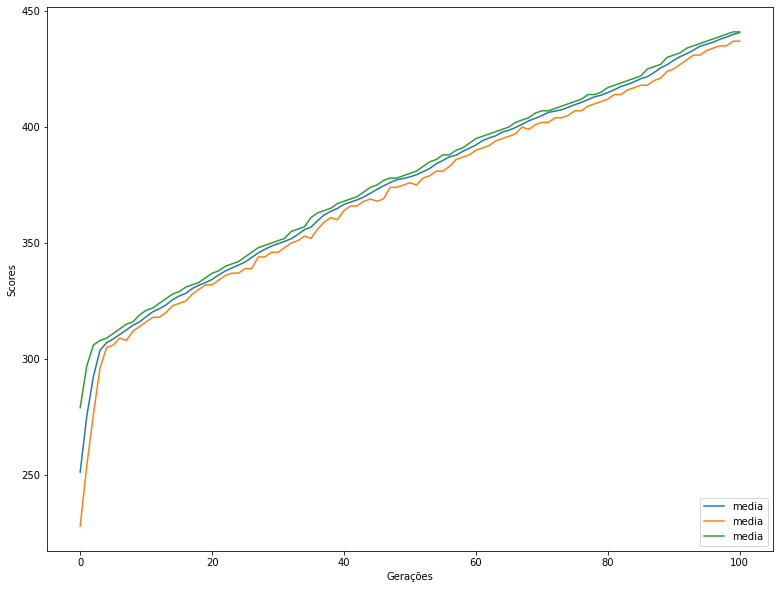

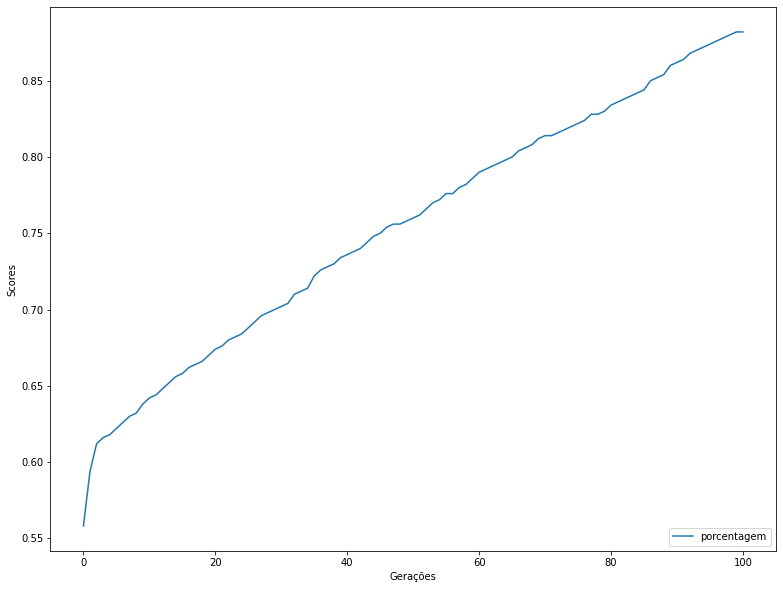

In [77]:
# taking data
y_porcent = log.select("porcent_of_the_best_solution")
y_mean = log.select("mean")
y_min = log.select("min")
y_max = log.select("max")
x_gen = log.select("gen")

#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_mean, label="media")
plt.plot(x_gen, y_min, label="media")
plt.plot(x_gen, y_max, label="media")

plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=4)

#plotting
plt.figure(figsize=(13,  10))
plt.plot(x_gen, y_porcent, label="porcentagem")
plt.xlabel("Gerações")
plt.ylabel("Scores")
plt.legend(loc=4)